In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('datasets/globalterrorismdb_0718dist.csv')

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
dataset.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [6]:
dataset.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [27]:
dataset = dataset[['Year','Month','Extended','Country','Day','state','Region','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [8]:
dataset.head()

,Year,Month,Extended,Country,Day,state,Region,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,Dominican Republic,2,NaN,Central America & Caribbean,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,0,Federal,North America,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,0,Tarlac,Southeast Asia,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,0,Attica,Western Europe,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,0,Fukouka,East Asia,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [9]:
dataset.isnull().sum()

Year                0
Month               0
Extended            0
Country             0
Day                 0
state             421
Region              0
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [10]:
# so we have null values in
#1. state
#2. latitude
#3. longitude
#4. Killed
#5. Wounded
#6. Target
#7. Summary
#8. Motive

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Extended     181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Day          181691 non-null  int64  
 5   state        181270 non-null  object 
 6   Region       181691 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(4),

In [18]:
dataset.describe(include = "all")

,Year,Month,Extended,Country,Day,state,Region,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
count,181691.000000,181691.000000,181691.000000,181691,181691.000000,181270,181691,177135.000000,1.771340e+05,181691,171378.000000,165380.000000,181055,115562,181691,181691,181691,50561
unique,NaN,NaN,NaN,205,NaN,2854,12,NaN,NaN,9,NaN,NaN,86006,112492,3537,22,12,14490
top,NaN,NaN,NaN,Iraq,NaN,Baghdad,Middle East & North Africa,NaN,NaN,Bombing/Explosion,NaN,NaN,Civilians,"09/00/2016: Sometime between September 18, 201...",Unknown,Private Citizens & Property,Explosives,Unknown
freq,NaN,NaN,NaN,24636,NaN,7645,50474,NaN,NaN,88255,NaN,NaN,6461,100,82782,43511,92426,14889
mean,2002.638997,6.467277,0.045346,NaN,15.505644,NaN,NaN,23.498343,-4.586957e+02,NaN,2.403272,3.167668,NaN,NaN,NaN,NaN,NaN,NaN
std,13.259430,3.388303,0.208063,NaN,8.814045,NaN,NaN,18.569242,2.047790e+05,NaN,11.545741,35.949392,NaN,NaN,NaN,NaN,NaN,NaN
min,1970.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,-53.154613,-8.618590e+07,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1991.000000,4.000000,0.000000,NaN,8.000000,NaN,NaN,11.510046,4.545640e+00,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2009.000000,6.000000,0.000000,NaN,15.000000,NaN,NaN,31.467463,4.324651e+01,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2014.000000,9.000000,0.000000,NaN,23.000000,NaN,NaN,34.685087,6.871033e+01,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
dataset.columns

Index(['Year', 'Month', 'Extended', 'Country', 'Day', 'state', 'Region',
       'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target',
       'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

In [31]:
# idxmax() function returns index of first occurrence of maximum over requested axis.
print("Country with most number of attacks :",dataset['Country'].value_counts().idxmax())  
print("Region with most number of attacks :",dataset['Region'].value_counts().idxmax())
print("Year with most number of attacks :",dataset['Year'].value_counts().idxmax())
print("Most attack types are :",dataset['AttackType'].value_counts().idxmax())

Country with most number of attacks : Iraq
Region with most number of attacks : Middle East & North Africa
Year with most number of attacks : 2014
Most attack types are : Bombing/Explosion


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


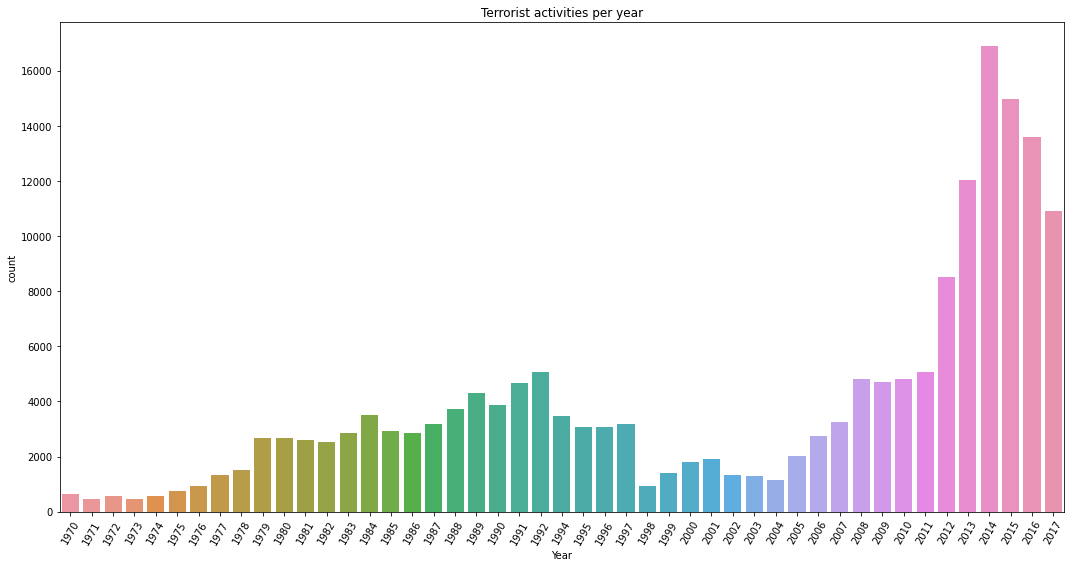

In [43]:
plt.subplots(figsize=(18,9))
sns.countplot(dataset['Year'])
plt.title("Terrorist activities per year")
plt.xticks(rotation=60)
plt.show()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


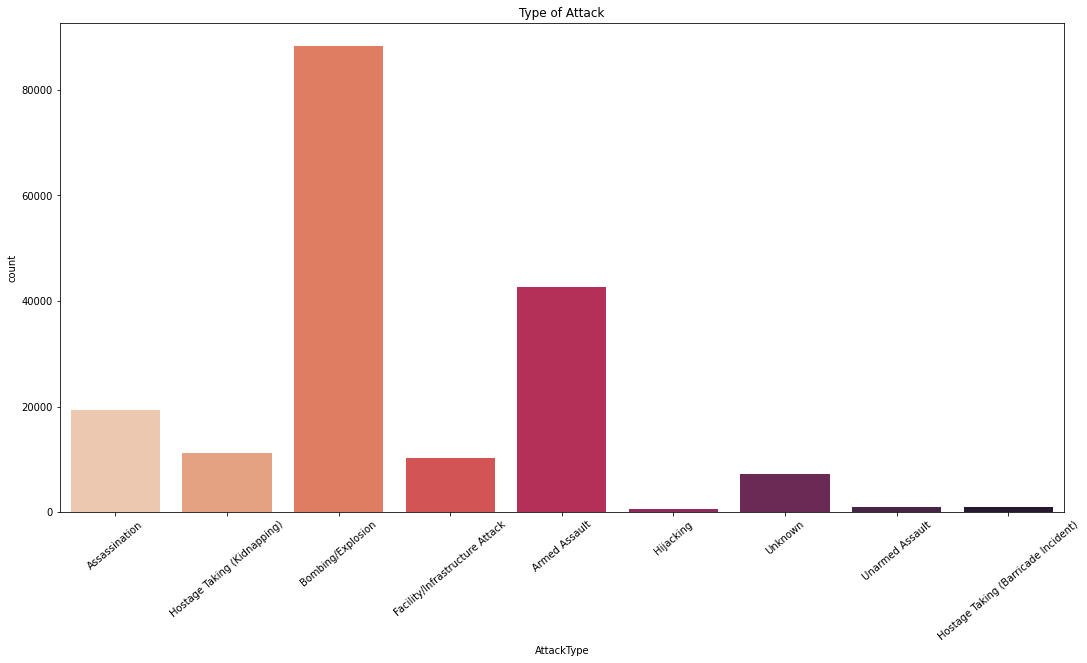

In [46]:
plt.subplots(figsize = (18,9))
sns.countplot(dataset['AttackType'],palette='rocket_r')
plt.title("Type of Attack")
plt.xticks(rotation=40)
plt.show()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


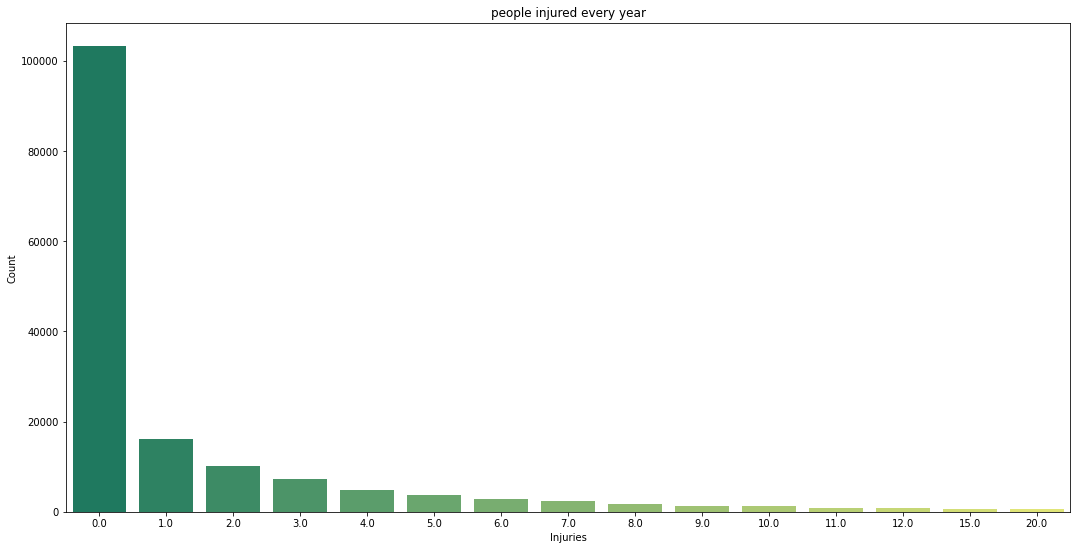

In [48]:
plt.subplots(figsize=(18,9))
sns.barplot(dataset['Wounded'].value_counts()[:20].index,dataset['Wounded'].value_counts()[:20].values,palette='summer')
plt.title("people injured every year")
plt.xlabel("Injuries")
plt.ylabel("Count")
plt.show()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


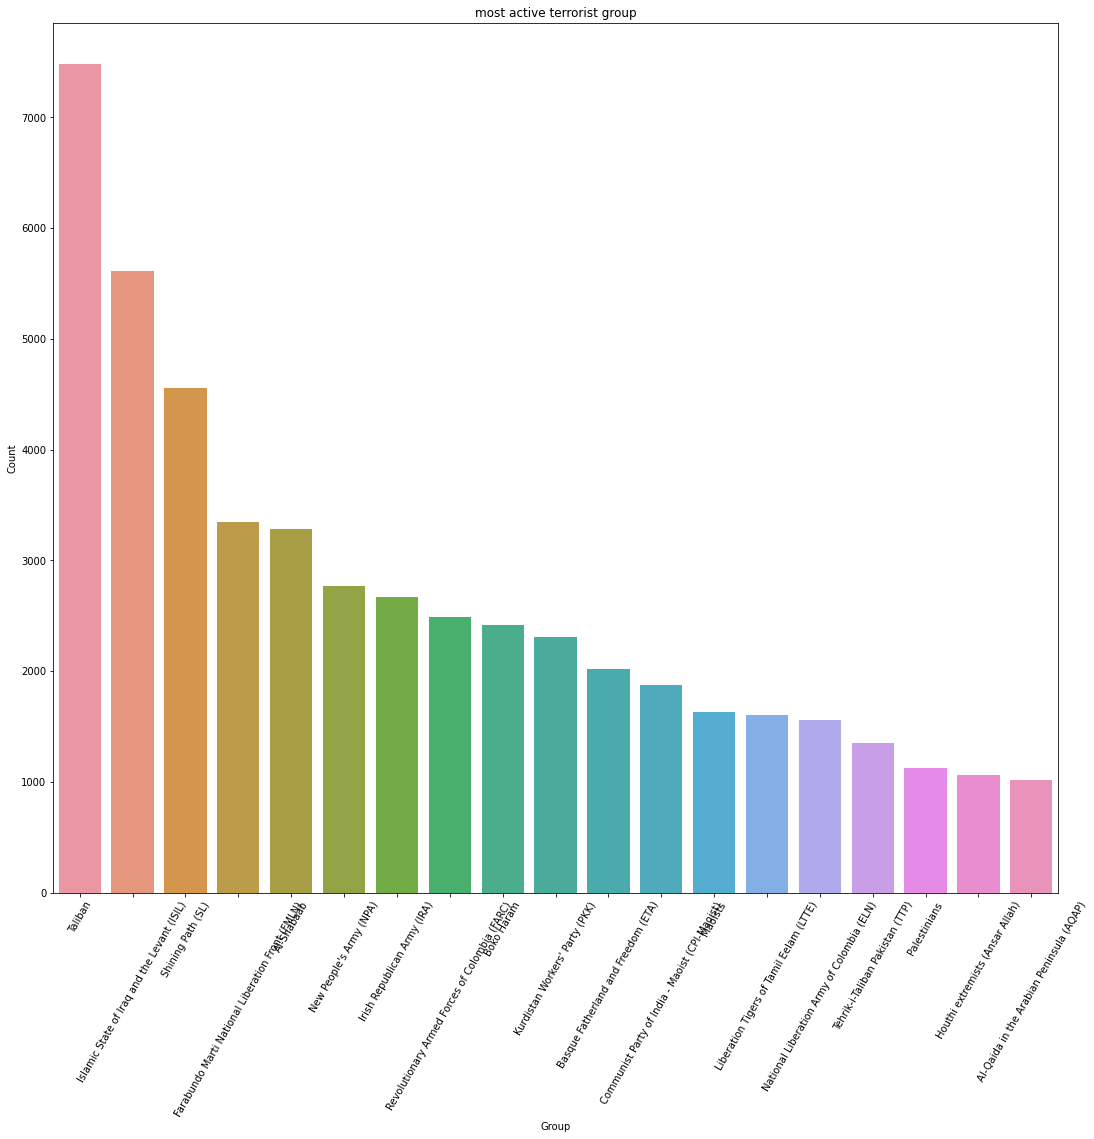

In [53]:
plt.subplots(figsize=(18,16))
sns.barplot(dataset['Group'].value_counts()[1:20].index,dataset['Group'].value_counts()[1:20].values)
plt.title("most active terrorist group")
plt.xticks(rotation=60)
plt.xlabel("Group")
plt.ylabel("Count")
plt.show()

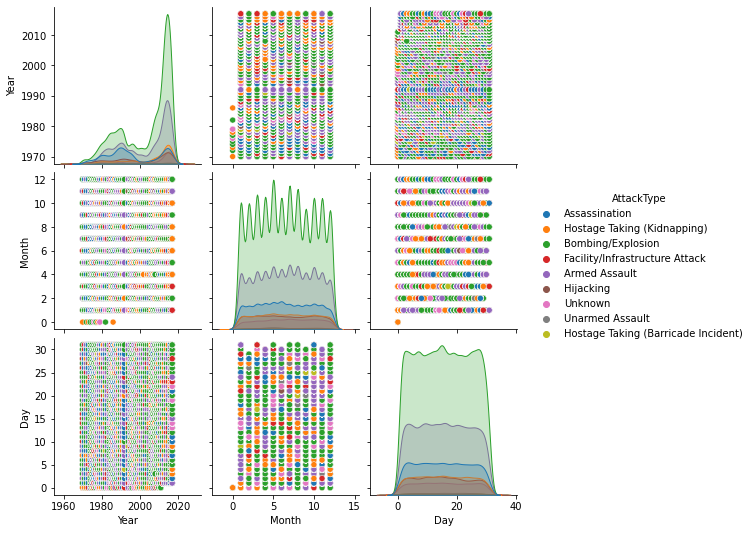

In [54]:
sns.pairplot(dataset,hue='AttackType',vars=['Year','Month','Day'])